In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('pstn_train.csv')

df = df.drop(['std','95%CI','votes'],axis=1)

df.to_csv('pstn_train2.csv',index=False)

In [5]:
dp = pd.read_csv('NISQA_corpus_file.csv')

dp = dp.drop(['db' , 'con' , 'file','filename_deg','filename_ref','source','noi','col','dis','loud','noi_std','col_std','dis_std','loud_std','filepath_deg','filepath_ref'], axis=1)

dp.to_csv('NISQA_corpus_file2.csv',index=False)

In [ ]:
print(dp.columns)
print(df.columns)

print("FORMATOS DOS ARQUIVOS")
print(dp.shape , "NISQA CORPUS")
print(df.shape , "pstn_train")



Index(['con_description', 'lang', 'votes', 'mos', 'mos_std'], dtype='object')
Index(['filename', 'MOS'], dtype='object')
FORMATOS DOS ARQUIVOS
(14432, 5) NISQA CORPUS
(58709, 2) pstn_train


In [12]:
cat = dp['con_description'].unique()

print("Valores únicos por coluna do NISQA CORPUS")

data = []
for cats in cat:
    #print(cats)
    #print(dp[dp['con_description'] == cats].shape)
    count = dp[dp['con_description'] == cats].shape[0]
    data.append({'con_description': cats, 'count': count})

# Cria um DataFrame a partir da lista
df_summary = pd.DataFrame(data)

# Exibe a tabela
print(df_summary)


Valores únicos por coluna do NISQA CORPUS
              con_description  count
0      Anchor: Fullband clean      8
1        Anchor: P50MNRU 25dB      8
2    Anchor: White Noise 12dB      8
3         Anchor: Level -20dB      8
4       Anchor: BP 500-2500Hz      8
..                        ...    ...
160            AMR-WB Medium       4
161            AMR-NB Medium       4
162              AMR-NB Good       4
163   VoIP-landline to mobile    584
164                 simulated  12500

[165 rows x 2 columns]


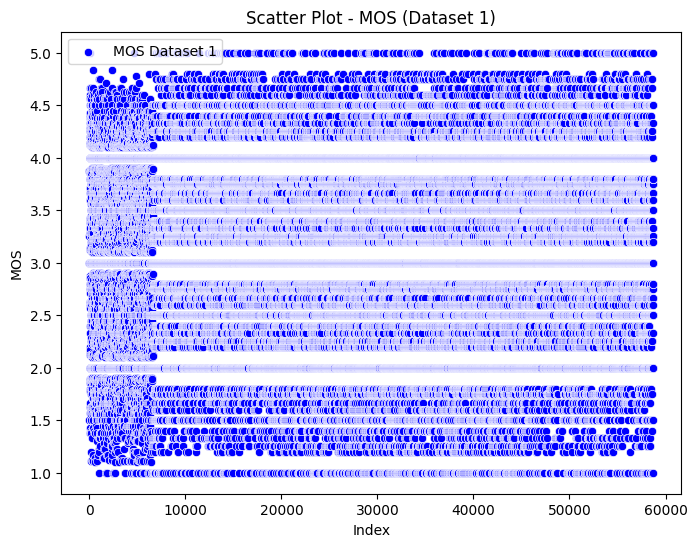

n



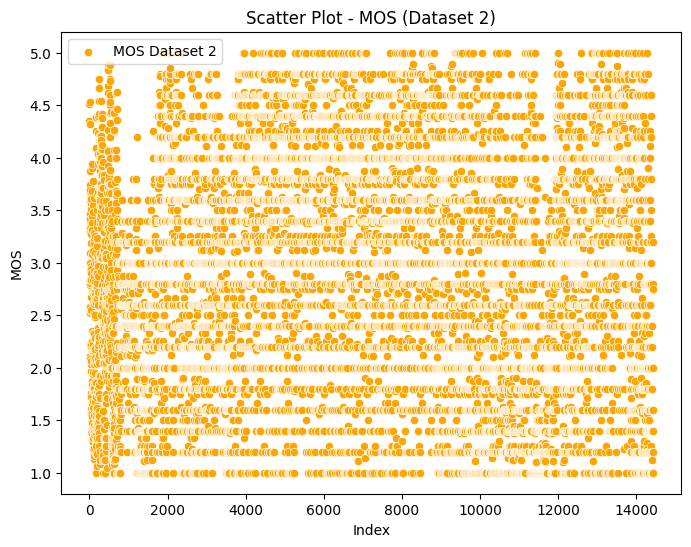

In [14]:
mos1 = df['MOS']
mos2 = dp['mos']


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y=mos1, color="blue", label="MOS Dataset 1")
plt.title("Scatter Plot - MOS (Dataset 1)")
plt.xlabel("Index")
plt.ylabel("MOS")
plt.legend()
plt.show()

print("n\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dp.index, y=mos2, color="orange", label="MOS Dataset 2")
plt.title("Scatter Plot - MOS (Dataset 2)")
plt.xlabel("Index")
plt.ylabel("MOS")
plt.legend()
plt.show()



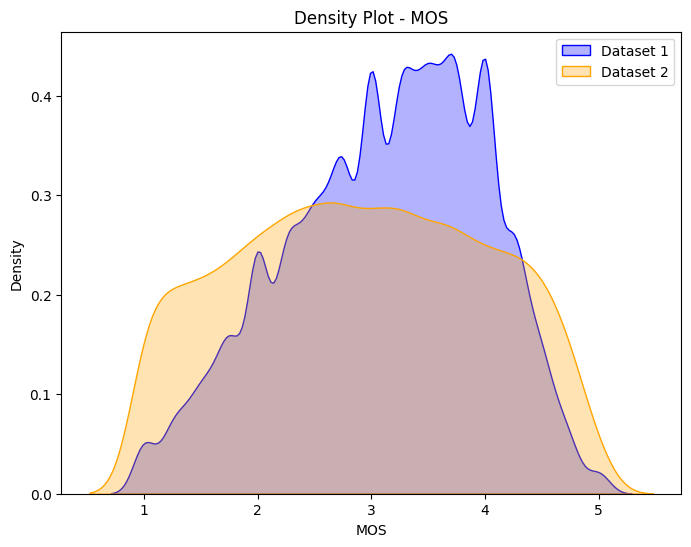

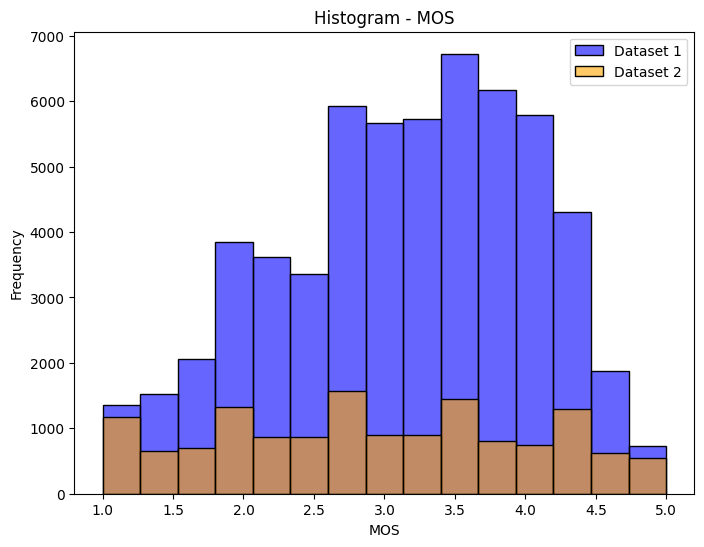

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(mos1, color="blue", label="Dataset 1", fill=True, alpha=0.3)
sns.kdeplot(mos2, color="orange", label="Dataset 2", fill=True, alpha=0.3)
plt.title("Density Plot - MOS")
plt.xlabel("MOS")
plt.ylabel("Density")
plt.legend()
plt.show()

print("\n")

plt.figure(figsize=(8, 6))
sns.histplot(mos1, color="blue", label="Dataset 1", bins=15, kde=False, alpha=0.6)
sns.histplot(mos2, color="orange", label="Dataset 2", bins=15, kde=False, alpha=0.6)
plt.title("Histogram - MOS")
plt.xlabel("MOS")
plt.ylabel("Frequency")
plt.legend()
plt.show()



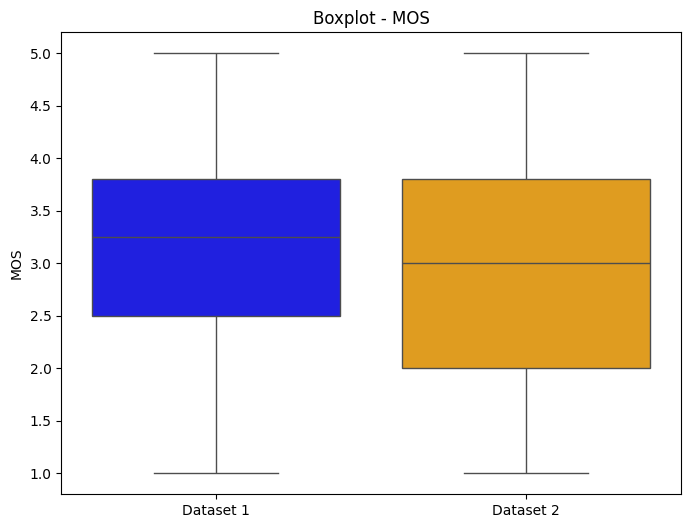

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[mos1, mos2], palette=["blue", "orange"])
plt.xticks([0, 1], ["Dataset 1", "Dataset 2"])
plt.title("Boxplot - MOS")
plt.ylabel("MOS")
plt.show()
